<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title :  Webscrapping and Data Visualization

#### Name: Ooi Caaron

#### IC Number: 990701-07-5837

#### Date : 5/7/23

#### Introduction : Learning webscrapping and data visualization, displaying data through different type of graph



#### Conclusion : Still need to practice more and do revision






## Mini Project 2 

## Webscraping and Data Visualization

Dataset: https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/

In this project, you are encouraged to use Worldometers to extract the number of COVID cases and then you will do data analysis and create some visualizations.

1)  Import required libraries and write code to do webscraping


In [3]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import texttable as tt
driver = webdriver.Chrome('C://GoogleDriver//chromedriver')
url='https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

2) After running above code you are able to extract the data from the website, now we will be creating a pandas data frame for further analysis.



<img src="https://i.imgur.com/OgcCBss.png">

In [4]:
df_data = []
for tr in soup.find_all('tr', attrs={'role': 'row'}):
    row_data = [td.text.rstrip() for td in tr.find_all('td')]
    if len(row_data) == 4:
        country, cases, deaths, region = row_data
        df_data.append([country, cases, deaths, region])

df = pd.DataFrame(df_data, columns=['Country', 'Cases', 'Deaths', 'Region'])
df = df[df.Region != '']
df

,Country,Cases,Deaths,Region
0,United States,"107,346,013","1,168,414",North America
1,India,"44,994,407","531,910",Asia
2,France,"40,138,560","167,642",Europe
3,Germany,"38,428,685","174,352",Europe
4,Brazil,"37,682,660","704,159",South America
...,...,...,...,...
224,Montserrat,"1,403",8,North America
225,Niue,820,0,Australia/Oceania
226,Holy See,29,0,Europe
227,Tokelau,23,0,Australia/Oceania


3) Data Type

<img src="https://i.imgur.com/YccV35I.png">

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  229 non-null    object
 1   Cases    229 non-null    object
 2   Deaths   229 non-null    object
 3   Region   229 non-null    object
dtypes: object(4)
memory usage: 8.9+ KB


4) Creating a new column Death_rate

Hint: Death_rate = 100*(Death/Number of cases) 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df['Deaths'] = df['Deaths'].str.replace(',', '')
df['Cases'] = df['Cases'].str.replace(',', '')
df['Deaths'] = pd.to_numeric(df['Deaths'])
df['Cases'] = pd.to_numeric(df['Cases'])

df['Death_rate'] = df['Deaths'] / df['Cases']
df['Death_rate'] = df['Death_rate'] * 100 
df

,Country,Cases,Deaths,Region,Death_rate
0,United States,107346013,1168414,North America,1.088456
1,India,44994407,531910,Asia,1.182169
2,France,40138560,167642,Europe,0.417658
3,Germany,38428685,174352,Europe,0.453703
4,Brazil,37682660,704159,South America,1.868655
...,...,...,...,...,...
224,Montserrat,1403,8,North America,0.570207
225,Niue,820,0,Australia/Oceania,0.000000
226,Holy See,29,0,Europe,0.000000
227,Tokelau,23,0,Australia/Oceania,0.000000


5) Data Visualization - Pairplot

<img src="https://i.imgur.com/ChYp5AF.png">

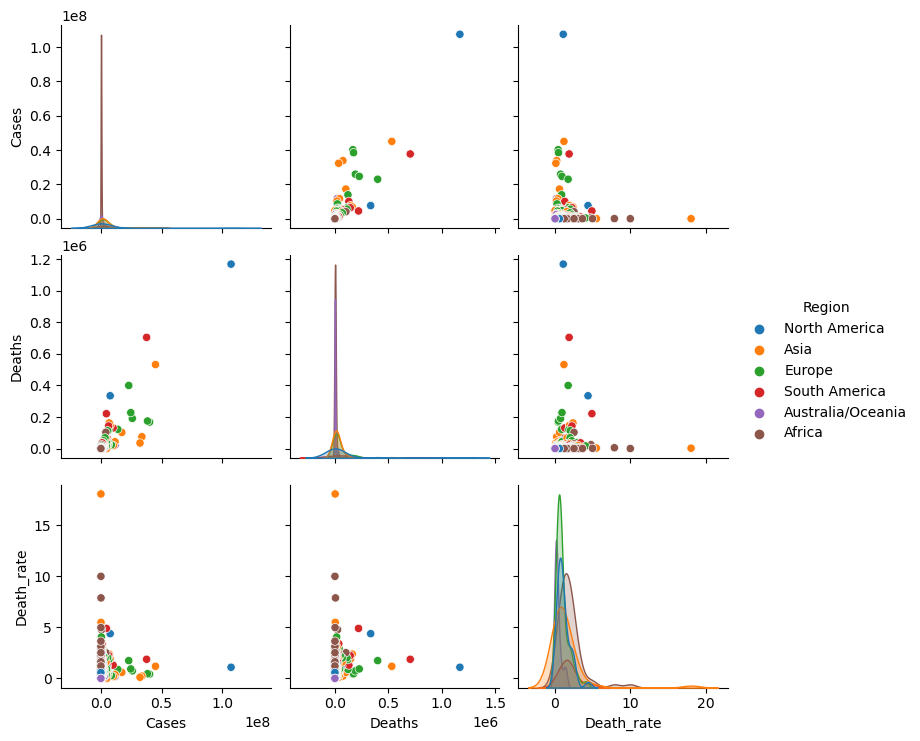

In [14]:
sns.pairplot(df, hue = 'Region')
plt.show()

6) Data Visualization - barplot

<img src="https://i.imgur.com/BipzQ1w.png">

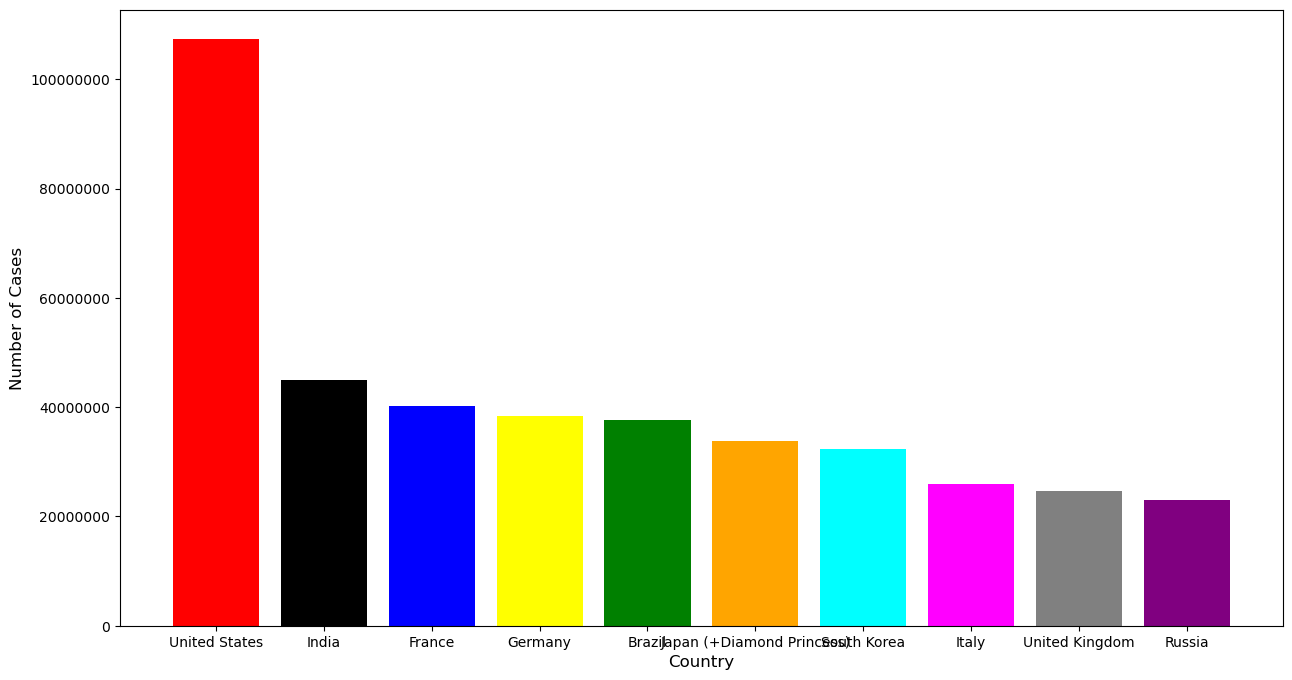

In [15]:
plt.figure(figsize = (15,8))
plt.bar(df['Country'].head(10),
        df['Cases'].head(10),
        color=['red','black','blue','yellow','green','orange','cyan','magenta','grey','purple'])
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Number of Cases', fontsize = 12)
plt.show()


7) Data Visualization - regplot

<img src="https://i.imgur.com/zMbQnVU.png">

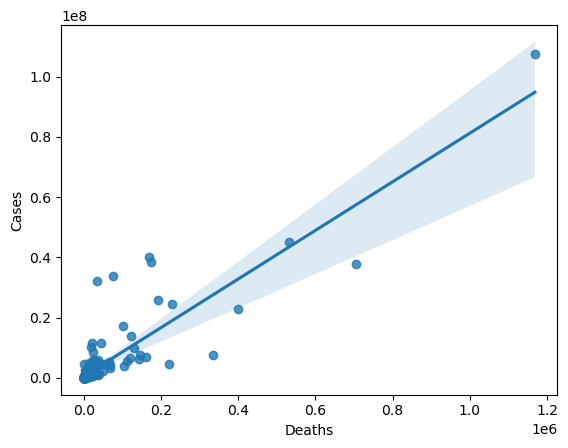

In [18]:
sns.regplot(x = df['Deaths'], y = df['Cases'], data = df)
plt.show()

8) Data Visualization - scatterplot

<img src="https://i.imgur.com/DXrhNSN.png">

<Axes: xlabel='Cases', ylabel='Deaths'>

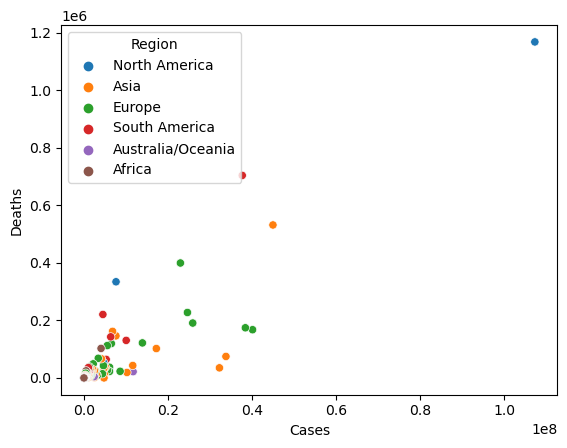

In [20]:
sns.scatterplot(x = df['Cases'], y = df['Deaths'], data = df , hue = 'Region')

9) Data Visualization - boxplot

<img src="https://i.imgur.com/jdnbzuf.png">

<Axes: xlabel='Country', ylabel='Deaths'>

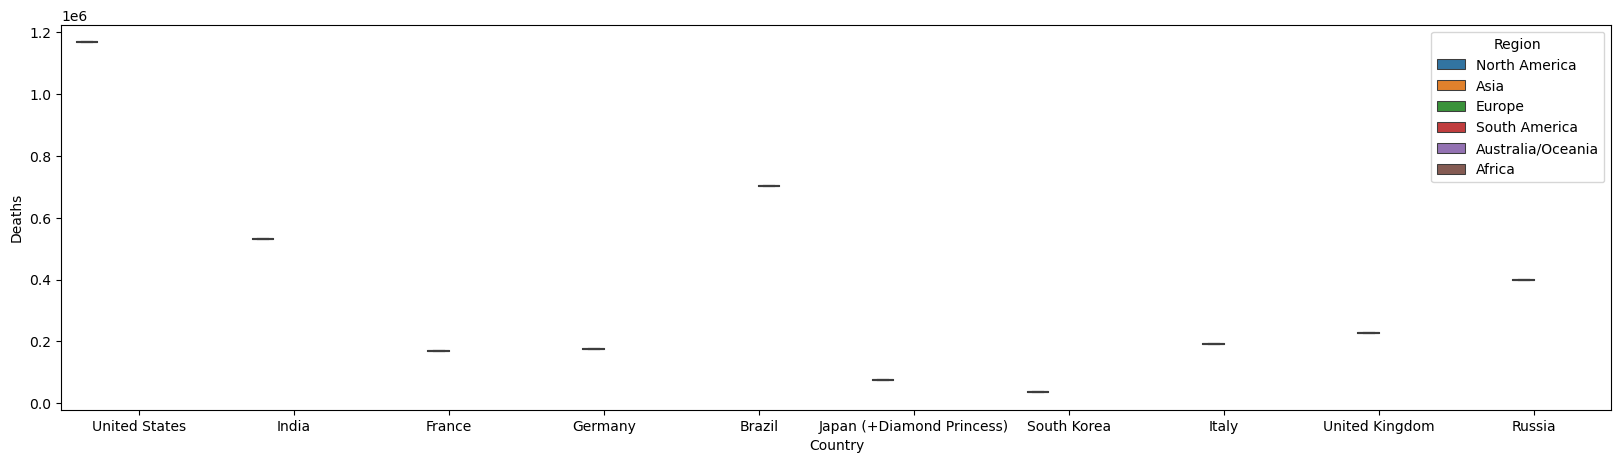

In [23]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = df['Country'].head(10), 
    y = df['Deaths'].head(10), data = df, hue = 'Region')

10) Write code to show the table as below

<img src="https://i.imgur.com/3mSmbKJ.png">

In [30]:
region = df.groupby('Region')[['Cases','Deaths','Death_rate']].sum().reset_index()
region = region.sort_values('Death_rate', ascending=False)
region

,Region,Cases,Deaths,Death_rate
0,Africa,12831369,258806,110.763916
1,Asia,218285604,1547803,68.704256
3,Europe,249685794,2067060,43.892636
4,North America,127017548,1637506,41.869273
5,South America,68833115,1357694,24.933219
2,Australia/Oceania,14538582,29206,6.586907


11) Data Visualization - barplot with death rate

<img src="https://i.imgur.com/lxA1NiM.png">

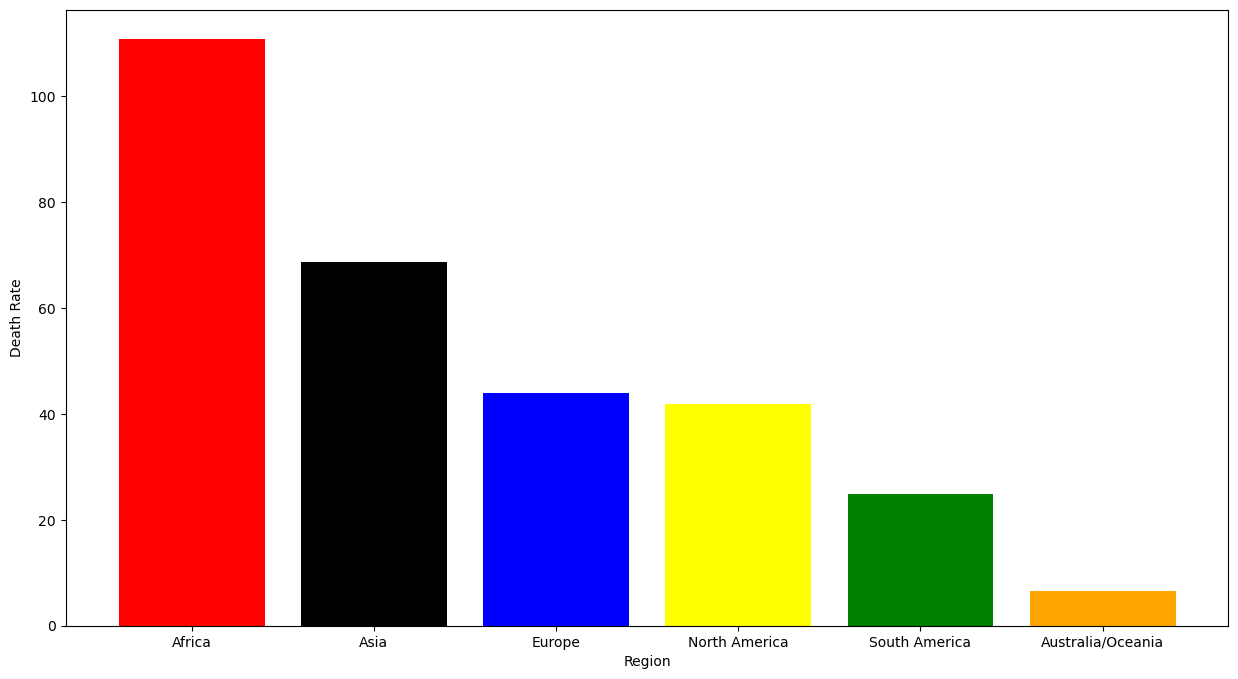

In [32]:
plt.figure(figsize = (15,8))
plt.bar(region['Region'], region['Death_rate'], color = ['red', 'black', 'blue', 'yellow', 'green', 'orange'])
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.xlabel('Region')
plt.ylabel('Death Rate')
plt.show()

12) Create texttable 

Hint: 
import texttable as tt

table = tt.Texttable() 
table.add_rows([(None, None, None, None)] + data)  # Add an empty row at the beginning for the headers 

<img src="https://i.imgur.com/r4LZ1aW.png">

In [8]:
df = df.head(10)
table = tt.Texttable()
table.set_cols_align(['a', 'a', 'a', 'a'])
table.set_cols_valign(['b', 'b', 'b', 'b'])
cases = df['Cases']
deaths = df['Deaths']
region = df['Region']
country = df['Country']
rows = [['Country', 'Cases', 'Deaths', 'Region']]

for x in range(10):
    rows.append([country[x], cases[x], deaths[x], region[x]])
    
table.add_rows(rows)

print(table.draw())

+---------------------------+-----------+---------+---------------+
|          Country          |   Cases   | Deaths  |    Region     |
+===========================+===========+=========+===============+
| United States             | 1.073e+08 | 1168414 | North America |
+---------------------------+-----------+---------+---------------+
| India                     | 44994407  | 531910  | Asia          |
+---------------------------+-----------+---------+---------------+
| France                    | 40138560  | 167642  | Europe        |
+---------------------------+-----------+---------+---------------+
| Germany                   | 38428685  | 174352  | Europe        |
+---------------------------+-----------+---------+---------------+
| Brazil                    | 37682660  | 704159  | South America |
+---------------------------+-----------+---------+---------------+
| Japan (+Diamond Princess) | 33804284  | 74707   | Asia          |
+---------------------------+-----------+-------